# Bag of visual word

In this laboratory we will see how to:

- Train a K-Means Clustering Model
- Build a Bag of Visual Words (BOVW) model;
- Use the BOVW model to represent images;
- Build a classifier using the BOVW representations;
- Build a Content Based Image Retrieval (CBIR) system;

# 1. K-Means Clustering

In [1]:
from statsmodels.datasets import get_rdataset
faithful = get_rdataset('faithful')
print("Number of records:",len(faithful.data))
faithful.data.head()

Number of records: 272


,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


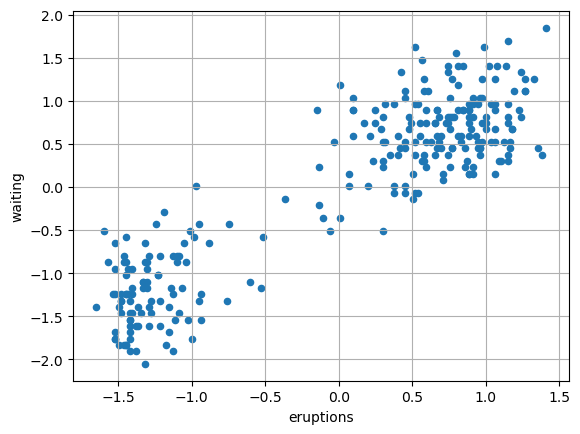

In [2]:
from matplotlib import pyplot as plt

# Normalizzazione 
faithful.data = (faithful.data-faithful.data.mean())/faithful.data.std()

faithful.data.plot(x='eruptions',y='waiting',kind='scatter')
plt.grid()
plt.show()

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(faithful.data)

KMeans(n_clusters=2, n_init=10)

In [4]:
clusters = kmeans.labels_
print(clusters)

[0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0
 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 0]


In [5]:
import pandas as pd
data = pd.DataFrame()
data['X'] = faithful.data['eruptions']
data['Y'] = faithful.data['waiting']
data['C'] = clusters.astype(int)
data.head()

,X,Y,C
0,0.098318,0.596025,0
1,-1.478733,-1.242890,1
2,-0.135612,0.228242,0
3,-1.055558,-0.654437,1
4,0.915755,1.037364,0


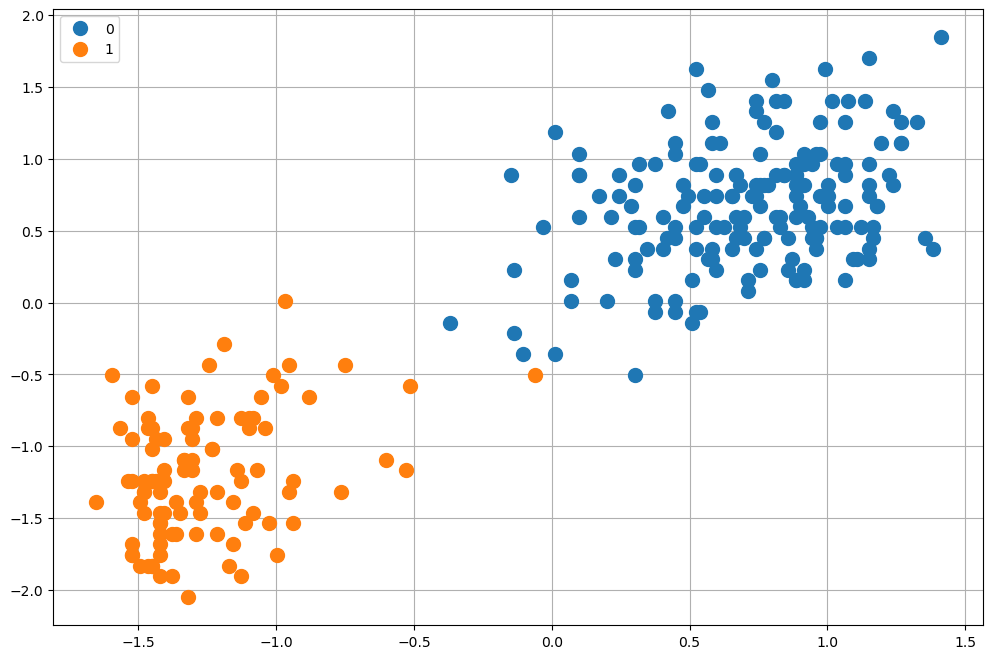

In [6]:
def plot2d(data):
    classes = sorted(data.C.unique())
    for c in classes:
        plt.plot(data.where(data.C==c).dropna().X.values,
                 data.where(data.C==c).dropna().Y.values,'o', markersize=10, label=str(c))

plt.figure(figsize=(12,8))
plot2d(data)
plt.legend()
plt.grid()
plt.show()

In [7]:
kmeans.cluster_centers_

array([[ 0.70839746,  0.67549972],
       [-1.25776692, -1.19935664]])

In [8]:
def plot_kmeans_decision_boundary(data, kmeans):
    plot2d(data)
    X = np.linspace(data.X.min(), data.X.max(),200)
    Y = np.linspace(data.Y.min(), data.Y.max(),200)
    X,Y = np.meshgrid(X,Y)
    
    Z = kmeans.predict(np.c_[X.ravel(), Y.ravel()])
    
    Z = np.array(Z).reshape(X.shape)
    
    plt.pcolormesh(X, Y, Z, antialiased=True, cmap='Set3')
    
    centers = kmeans.cluster_centers_
    
    plt.plot(centers[:,0],centers[:,1],'kX',markersize=10,label='centroids')

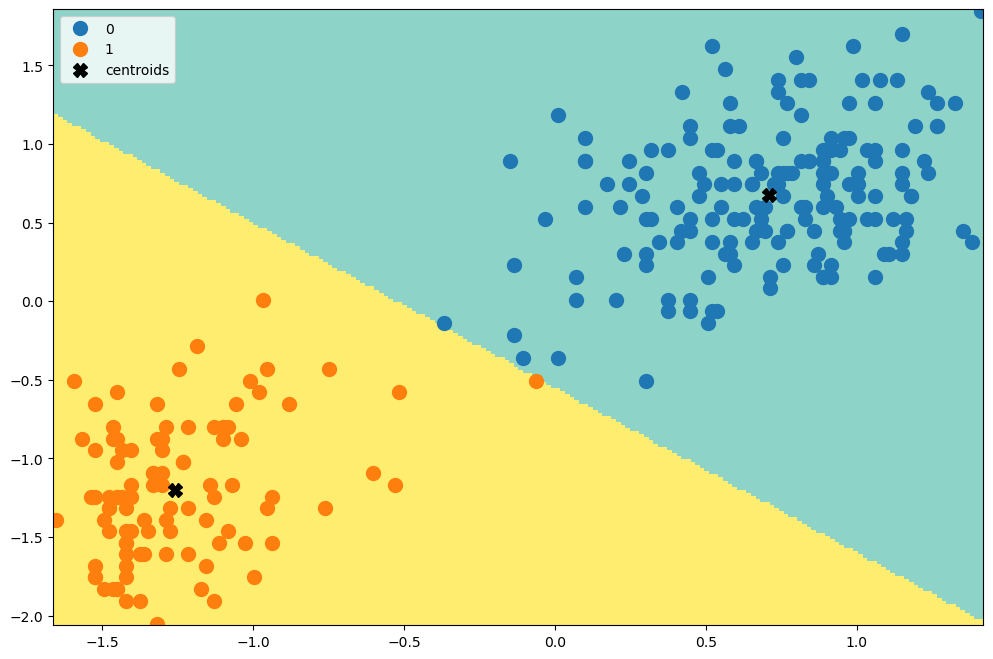

In [9]:
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

plt.figure(figsize=(12,8))
plot_kmeans_decision_boundary(data,kmeans)
plt.legend()
plt.show()

# 1.1 Example with the DIGITS dataset

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
print("Number of elements: %d, Number of dimensions: %d" % digits.data.shape)

Number of elements: 1797, Number of dimensions: 64


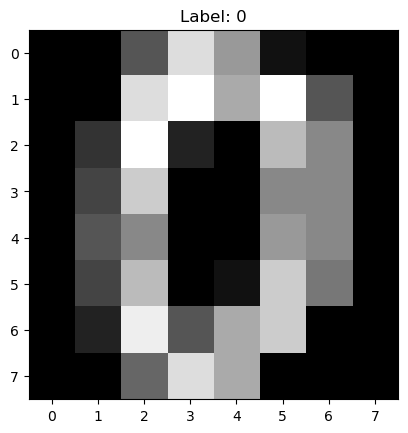

In [11]:
plt.imshow(digits.data[0].reshape((8,8)),cmap='gray')
plt.title("Label: %d" % digits.target[0])
plt.show()

In [12]:
kmeans = KMeans(n_clusters=10, n_init=10)
kmeans.fit(digits.data)

KMeans(n_clusters=10, n_init=10)

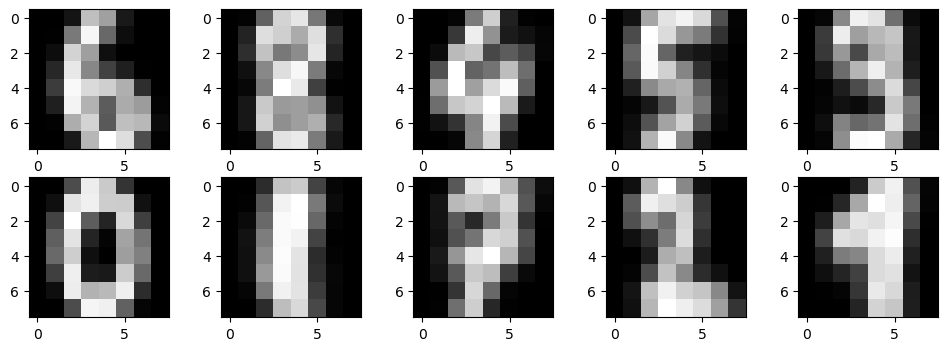

In [13]:
plt.figure(figsize=(12,4))

centroidi = kmeans.cluster_centers_

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(centroidi[i].reshape((8,8)),cmap='gray')
    
plt.show()

In [14]:
from scipy.stats import mode
cluster_assignments = kmeans.labels_

purity = np.zeros(10)
most_frequent_label = np.zeros(10)

for c in range(10):
    training_labels = digits.target[cluster_assignments==c]
    most_frequent_label[c] = mode(training_labels).mode
    purity[c] = (training_labels==most_frequent_label[c]).mean()
    
    print("Cluster %d. Most frequent label: %d. Purity: %0.2f" % (c,most_frequent_label[c],purity[c]))

Cluster 0. Most frequent label: 6. Purity: 0.97
Cluster 1. Most frequent label: 8. Purity: 0.83
Cluster 2. Most frequent label: 4. Purity: 0.98
Cluster 3. Most frequent label: 5. Purity: 0.87
Cluster 4. Most frequent label: 3. Purity: 0.44
Cluster 5. Most frequent label: 0. Purity: 0.99
Cluster 6. Most frequent label: 1. Purity: 0.81
Cluster 7. Most frequent label: 7. Purity: 0.86
Cluster 8. Most frequent label: 2. Purity: 0.83
Cluster 9. Most frequent label: 1. Purity: 0.61


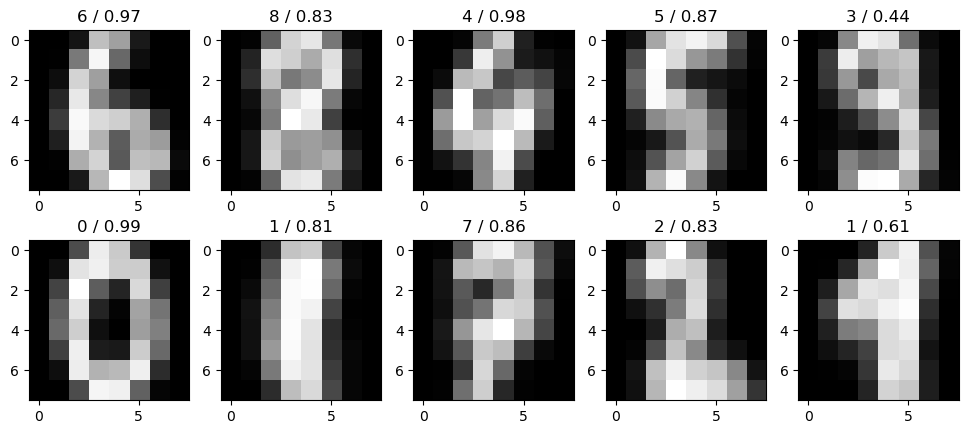

In [15]:
plt.figure(figsize=(12,5))

centroidi = kmeans.cluster_centers_

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(centroidi[i].reshape((8,8)),cmap='gray')
    plt.title("%d / %0.2f" % (most_frequent_label[i],purity[i]))
    
plt.show()

# 2. Bag of visual words

## 2.1 Dataset

In [16]:
from glob import glob
filenames = glob('scenes/*.jpg')
print(filenames[:10])

['scenes/tallbuilding_art1392.jpg', 'scenes/coast_osun54.jpg', 'scenes/highway_gre467.jpg', 'scenes/insidecity_a385019.jpg', 'scenes/opencountry_natu852.jpg', 'scenes/coast_natu469.jpg', 'scenes/opencountry_nat822.jpg', 'scenes/highway_bost314.jpg', 'scenes/mountain_n219008.jpg', 'scenes/insidecity_hous50.jpg']


In [17]:
classes = list(map(lambda x: x.split('/')[1].split('_')[0], filenames))
print(classes[:10])

['tallbuilding', 'coast', 'highway', 'insidecity', 'opencountry', 'coast', 'opencountry', 'highway', 'mountain', 'insidecity']


In [18]:
import pandas as pd
data=pd.DataFrame({'filename':filenames, 'class':classes})
data.head()

,filename,class
0,scenes/tallbuilding_art1392.jpg,tallbuilding
1,scenes/coast_osun54.jpg,coast
2,scenes/highway_gre467.jpg,highway
3,scenes/insidecity_a385019.jpg,insidecity
4,scenes/opencountry_natu852.jpg,opencountry


In [19]:
from sklearn.model_selection import train_test_split
#we will use a seed for repeatability of the split
import numpy as np
np.random.seed(123)
data_train, data_test = train_test_split(data, test_size=0.25)
print(len(data_train), len(data_test))
data_train.head()

2016 672


,filename,class
2065,scenes/insidecity_par129.jpg,insidecity
633,scenes/mountain_nat73.jpg,mountain
1955,scenes/highway_gre609.jpg,highway
970,scenes/mountain_nat29.jpg,mountain
515,scenes/highway_bost310.jpg,highway


In [20]:
from matplotlib import pyplot as plt
from skimage import io
def showImage(data, index):
    row = data.iloc[index]
    im = io.imread(row['filename'])
    plt.title(f"Class: {row['class']}")
    plt.axis('off')
    plt.imshow(im)

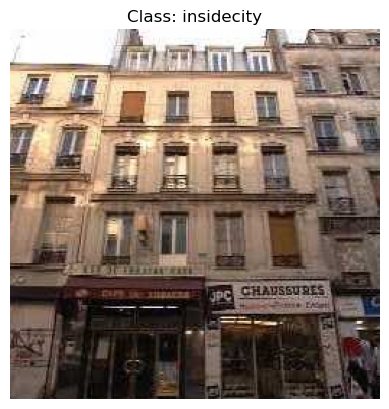

In [21]:
showImage(data_train,0)

In [22]:
_, data_small = train_test_split(data, test_size=0.05)
np.random.seed(145)
print(len(data_small))

135


In [23]:
data_small_train, data_small_test = train_test_split(data_small, test_size=0.15)
print(len(data_small_train), len(data_small_test))

114 21
